In [446]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(11, 4)})

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from statistics import mean, stdev


## Load data

In [447]:
samples = pd.read_csv("data/raw/dataset_mood_smartphone.csv", 
                      sep=',', 
                      index_col=0, 
                      parse_dates=["time"],
                      dtype={"id": "category", "variable": "category"})
samples = samples.rename(columns={"time": "datetime"})
samples

,id,datetime,variable,value
1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...
2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


## Remove duplicates

In [448]:
dupes = samples.duplicated(subset=['datetime', 'variable', 'id'], keep='last')
samples_deduped = samples[dupes == False]

## Remove negative values for appCat.* variables

In [449]:
samples_cleaned = samples_deduped[(~(samples_deduped['variable'].str.startswith('app'))) |
                                   ((samples_deduped['variable'].str.startswith('app')) & 
                                   (samples_deduped['value'] > 0))]
samples_cleaned

,id,datetime,variable,value
1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...
2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


## Remove outliers

In [450]:
## Todo

## Pivot the data to a time indexed data frame 
https://pandas.pydata.org/docs/user_guide/reshaping.html

In [541]:
vdata = samples_cleaned.pivot(index="datetime", columns=["id", "variable"], values="value")
vdata

id,AS14.01,AS14.02,AS14.03,AS14.05,AS14.06,AS14.07,AS14.08,AS14.09,AS14.12,AS14.13,...,AS14.06,AS14.09,AS14.12,AS14.16,AS14.25,AS14.26,AS14.27,AS14.28,AS14.30,AS14.32
variable,mood,mood,mood,mood,mood,mood,mood,mood,mood,mood,...,appCat.weather,appCat.weather,appCat.weather,appCat.weather,appCat.weather,appCat.weather,appCat.weather,appCat.weather,appCat.weather,appCat.weather
datetime,,,,,,,,,,,,,,,,,,,,,
2014-02-17 07:00:52.197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-17 07:12:13.631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-17 07:49:19.635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-17 08:57:16.313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-17 08:58:58.471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-08 11:03:34.453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-08 11:04:20.233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Make features
More feature ideas: 
- weekday vs. weekend day
- day of the week
- recent values from patient-reported data
- relevant app usage data
- use weighted window for aggregated features from the past days

To do feature engineering:
- missing mood values: either
   - remove timespans with no mood data: keep only the longest continuous timespan with mood data
   - only remove outside timespans with no mood data, and *backfill* (NOT *interpolate*) inside (seems reasonable for most patient, except maybe the last two)

To do data cleaning:
- discard outliers

To do train:
- retrain on whole train partition after CV

In [587]:
ids = list(samples["id"].unique())
positive_mood_threshold = 7
longest_allowed_gap = 1

d = {}
for id in ids:
    d[(id, "mood_1D")] = vdata.loc[:, (id , 'mood')].resample('D').mean()
    d[(id, "mood_1D_ffilled")] = vdata.loc[:, (id , 'mood')].resample('D').mean().fillna(method='ffill', limit=longest_allowed_gap)
    d[(id, "valence_1D")] = vdata.loc[:, (id , 'circumplex.valence')].resample('D').mean()
    d[(id, "arousal_1D")] = vdata.loc[:, (id , 'circumplex.arousal')].resample('D').mean()
    d[(id, "social_1D")] = vdata.loc[:, (id , 'appCat.social')].resample('D').sum()
    d[(id, "social_rolling_5D")] = vdata.loc[:, (id , 'appCat.social')].rolling('5D').sum().resample('D').mean() / 5
    d[(id, "social_rolling_10D")] = vdata.loc[:, (id , 'appCat.social')].rolling('10D').sum().resample('D').mean() / 10
    
    mood = vdata.loc[:, (id, 'mood')]
    mood.dropna(inplace=True)
    d[(id, 'mood_first')] = mood.resample('D').first()
    d[(id, 'mood_last')] = mood.resample('D').last()
    d[(id, 'mood_delta')] = features.loc[:, (id, 'mood_last')] - features.loc[:, (id, 'mood_first')]
    
    #d[(id, "target")] = vdata.loc[:, (id , 'mood')].resample('D').mean().shift(-1)
    d[(id, "target")] = d[(id, "mood_1D_ffilled")].shift(-1)
    # converting to int just so we can plot it
    d[(id, "target_binary")] = (d[(id, "target")] >= positive_mood_threshold).astype(int)
    
features = pd.DataFrame(d)
features

AS14.01                                                  \
           mood_1D mood_1D_ffilled valence_1D arousal_1D social_1D   
datetime                                                             
2014-02-17     NaN             NaN        NaN        NaN       0.0   
2014-02-18     NaN             NaN        NaN        NaN       0.0   
2014-02-19     NaN             NaN        NaN        NaN       0.0   
2014-02-20     NaN             NaN        NaN        NaN       0.0   
2014-02-21     NaN             NaN        NaN        NaN       0.0   
...            ...             ...        ...        ...       ...   
2014-06-05     NaN             NaN        NaN        NaN       0.0   
2014-06-06     NaN             NaN        NaN        NaN       0.0   
2014-06-07     NaN             NaN        NaN        NaN       0.0   
2014-06-08     NaN             NaN        NaN        NaN       0.0   
2014-06-09     NaN             NaN        NaN        NaN       0.0   

                                                                      \
           social_rolling_5D social_rolling_10D mood_first mood_last   
datetime                                                               
2014-02-17               NaN                NaN        NaN       NaN   
2014-02-18               NaN                NaN        NaN       NaN   
2014-02-19               NaN                NaN        NaN       NaN   
2014-02-20               NaN                NaN        NaN       NaN   
2014-02-21               NaN                NaN        NaN       NaN   
...                      ...                ...        ...       ...   
2014-06-05               NaN                NaN        NaN       NaN   
2014-06-06               NaN                NaN        NaN       NaN   
2014-06-07               NaN                NaN        NaN       NaN   
2014-06-08               NaN                NaN        NaN       NaN   
2014-06-09               NaN                NaN        NaN       NaN   

                       ...    AS14.33                                         \
           mood_delta  ... valence_1D arousal_1D social_1D social_rolling_5D   
datetime               ...                                                     
2014-02-17        NaN  ...        NaN        NaN       0.0               NaN   
2014-02-18        NaN  ...        NaN        NaN       0.0               NaN   
2014-02-19        NaN  ...        NaN        NaN       0.0               NaN   
2014-02-20        NaN  ...        NaN        NaN       0.0               NaN   
2014-02-21        NaN  ...        NaN        NaN       0.0               NaN   
...               ...  ...        ...        ...       ...               ...   
2014-06-05        NaN  ...        NaN        NaN       0.0               NaN   
2014-06-06        NaN  ...        NaN        NaN       0.0               NaN   
2014-06-07        NaN  ...        NaN        NaN       0.0               NaN   
2014-06-08        NaN  ...        NaN        NaN       0.0               NaN   
2014-06-09        NaN  ...        NaN        NaN       0.0               NaN   

                                                                      \
           social_rolling_10D mood_first mood_last mood_delta target   
datetime                                                               
2014-02-17                NaN        NaN       NaN        NaN    NaN   
2014-02-18                NaN        NaN       NaN        NaN    NaN   
2014-02-19                NaN        NaN       NaN        NaN    NaN   
2014-02-20                NaN        NaN       NaN        NaN    NaN   
2014-02-21                NaN        NaN       NaN        NaN    NaN   
...                       ...        ...       ...        ...    ...   
2014-06-05        1497.527814        NaN       NaN        NaN    NaN   
2014-06-06        1135.224557        NaN       NaN        NaN    NaN   
2014-06-07         885.347048        NaN       NaN        NaN    NaN   
2014-06-08         425.951245       

In [559]:
features.index

DatetimeIndex(['2014-02-17', '2014-02-18', '2014-02-19', '2014-02-20',
               '2014-02-21', '2014-02-22', '2014-02-23', '2014-02-24',
               '2014-02-25', '2014-02-26',
               ...
               '2014-05-31', '2014-06-01', '2014-06-02', '2014-06-03',
               '2014-06-04', '2014-06-05', '2014-06-06', '2014-06-07',
               '2014-06-08', '2014-06-09'],
              dtype='datetime64[ns]', name='datetime', length=113, freq='D')

In [560]:
features.columns.tolist()

[('AS14.01', 'mood_1D'),
 ('AS14.01', 'mood_1D_ffilled'),
 ('AS14.01', 'valence_1D'),
 ('AS14.01', 'arousal_1D'),
 ('AS14.01', 'social_1D'),
 ('AS14.01', 'social_rolling_5D'),
 ('AS14.01', 'social_rolling_10D'),
 ('AS14.01', 'mood_first'),
 ('AS14.01', 'mood_last'),
 ('AS14.01', 'mood_delta'),
 ('AS14.01', 'target'),
 ('AS14.01', 'target_binary'),
 ('AS14.02', 'mood_1D'),
 ('AS14.02', 'mood_1D_ffilled'),
 ('AS14.02', 'valence_1D'),
 ('AS14.02', 'arousal_1D'),
 ('AS14.02', 'social_1D'),
 ('AS14.02', 'social_rolling_5D'),
 ('AS14.02', 'social_rolling_10D'),
 ('AS14.02', 'mood_first'),
 ('AS14.02', 'mood_last'),
 ('AS14.02', 'mood_delta'),
 ('AS14.02', 'target'),
 ('AS14.02', 'target_binary'),
 ('AS14.03', 'mood_1D'),
 ('AS14.03', 'mood_1D_ffilled'),
 ('AS14.03', 'valence_1D'),
 ('AS14.03', 'arousal_1D'),
 ('AS14.03', 'social_1D'),
 ('AS14.03', 'social_rolling_5D'),
 ('AS14.03', 'social_rolling_10D'),
 ('AS14.03', 'mood_first'),
 ('AS14.03', 'mood_last'),
 ('AS14.03', 'mood_delta'),
 ('AS

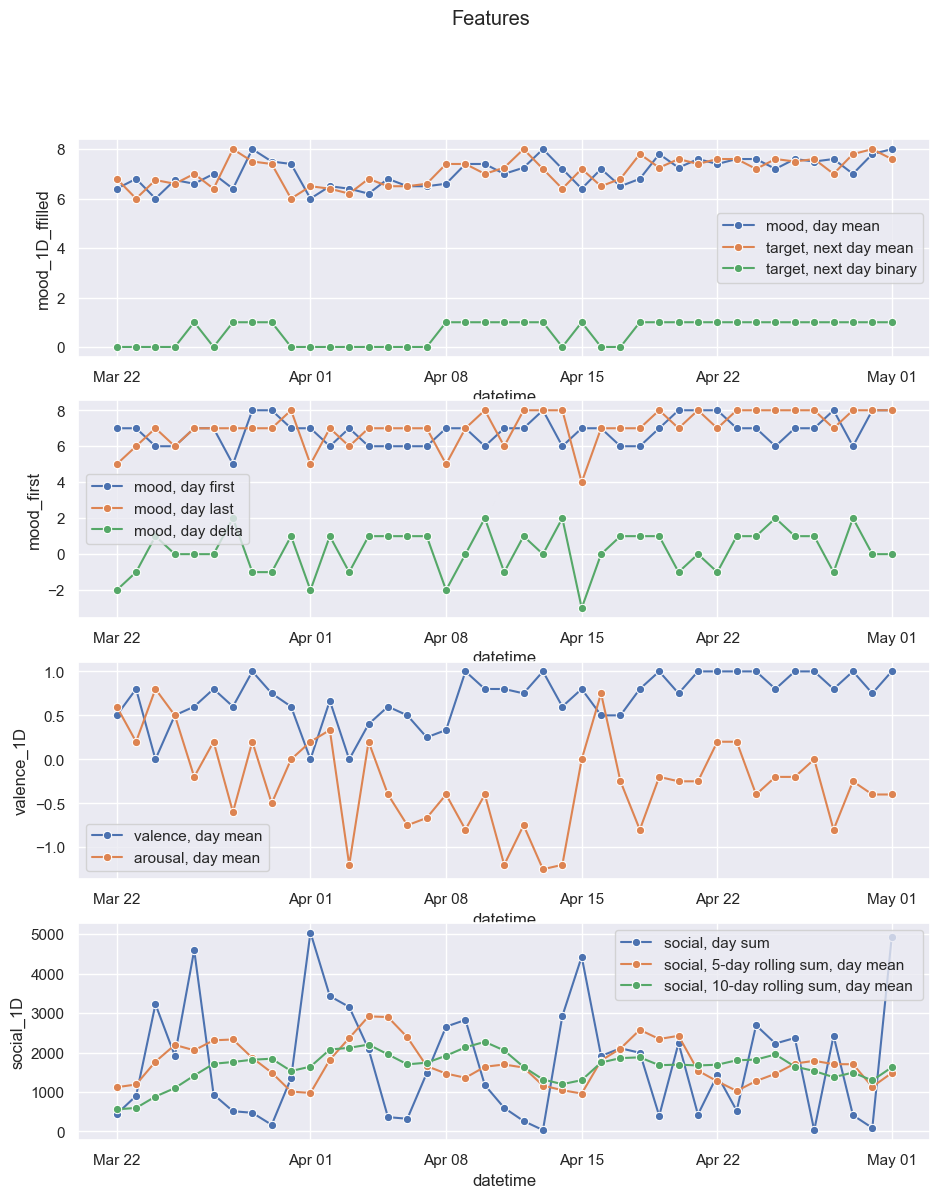

In [561]:
id = 'AS14.01'
start, end = '2014-03-22', '2014-05-01'
data = features[id]

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(11, 13))
for ax in axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.suptitle('Features')

sns.lineplot(ax=axs[0], data=data['mood_1D_ffilled'].loc[start:end], label='mood, day mean', marker='o')
sns.lineplot(ax=axs[0], data=data['target'].loc[start:end], label='target, next day mean', marker='o')
sns.lineplot(ax=axs[0], data=data['target_binary'].loc[start:end], label='target, next day binary', marker='o')

sns.lineplot(ax=axs[1], data=data['mood_first'].loc[start:end], label='mood, day first', marker='o')
sns.lineplot(ax=axs[1], data=data['mood_last'].loc[start:end], label='mood, day last', marker='o')
sns.lineplot(ax=axs[1], data=data['mood_delta'].loc[start:end], label='mood, day delta', marker='o')

sns.lineplot(ax=axs[2], data=data['valence_1D'].loc[start:end], label='valence, day mean', marker='o')
sns.lineplot(ax=axs[2], data=data['arousal_1D'].loc[start:end], label='arousal, day mean', marker='o')

sns.lineplot(ax=axs[3], data=data['social_1D'].loc[start:end], marker='o', label='social, day sum')
sns.lineplot(ax=axs[3], data=data['social_rolling_5D'].loc[start:end], marker='o', label='social, 5-day rolling sum, day mean ');
sns.lineplot(ax=axs[3], data=data['social_rolling_10D'].loc[start:end], marker='o', label='social, 10-day rolling sum, day mean ');


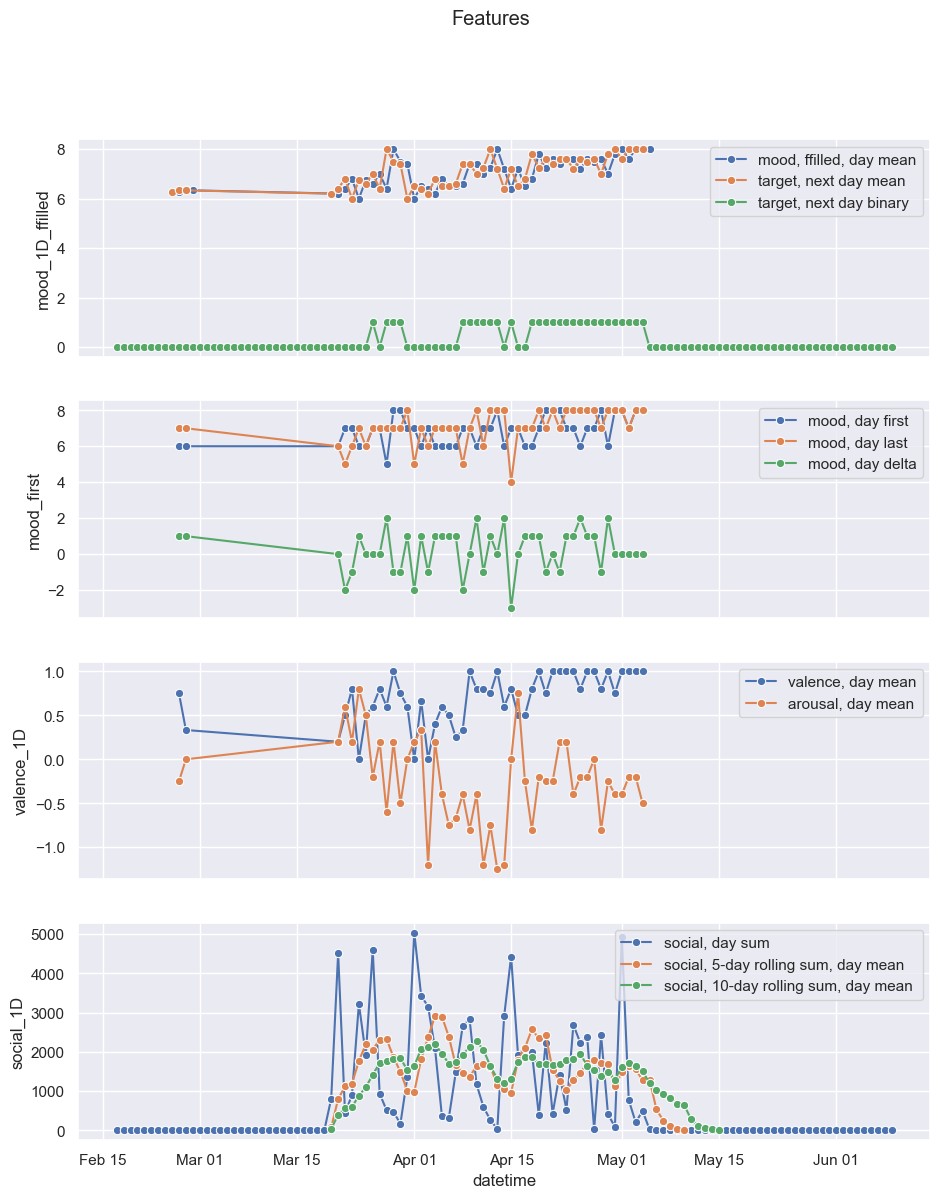

In [562]:
id = 'AS14.01'
data = features[id]

fig, axs = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(11, 13))
for ax in axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.suptitle('Features')

sns.lineplot(ax=axs[0], data=data['mood_1D_ffilled'], label='mood, ffilled, day mean', marker='o')
sns.lineplot(ax=axs[0], data=data['target'], label='target, next day mean', marker='o')
sns.lineplot(ax=axs[0], data=data['target_binary'], label='target, next day binary', marker='o')

sns.lineplot(ax=axs[1], data=data['mood_first'], label='mood, day first', marker='o')
sns.lineplot(ax=axs[1], data=data['mood_last'], label='mood, day last', marker='o')
sns.lineplot(ax=axs[1], data=data['mood_delta'], label='mood, day delta', marker='o')

sns.lineplot(ax=axs[2], data=data['valence_1D'], label='valence, day mean', marker='o')
sns.lineplot(ax=axs[2], data=data['arousal_1D'], label='arousal, day mean', marker='o')

sns.lineplot(ax=axs[3], data=data['social_1D'], marker='o', label='social, day sum')
sns.lineplot(ax=axs[3], data=data['social_rolling_5D'], marker='o', label='social, 5-day rolling sum, day mean ');
sns.lineplot(ax=axs[3], data=data['social_rolling_10D'], marker='o', label='social, 10-day rolling sum, day mean ');


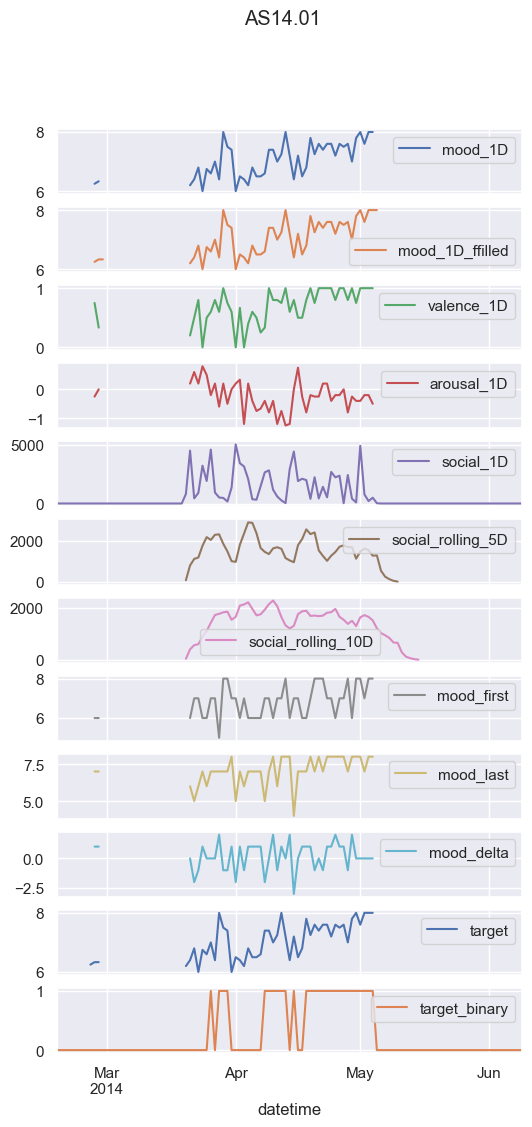

In [563]:
data.plot(subplots=True, figsize=(6, 12), title=id);

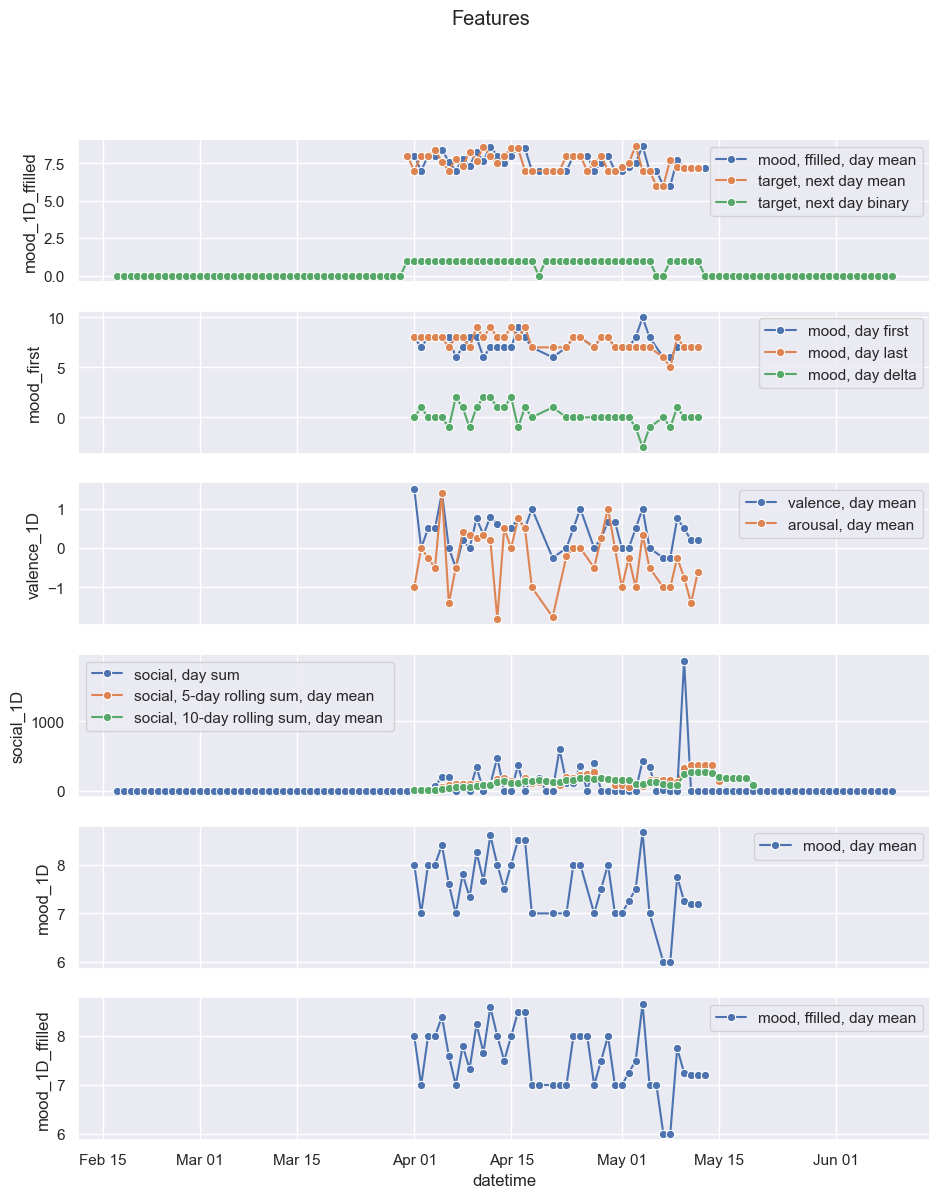

In [566]:
id = 'AS14.32'
data = features[id]

fig, axs = plt.subplots(nrows=6, ncols=1, sharex=True, figsize=(11, 13))
for ax in axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.suptitle('Features')

sns.lineplot(ax=axs[5], data=data['mood_1D_ffilled'], label='mood, ffilled, day mean', marker='o')
sns.lineplot(ax=axs[4], data=data['mood_1D'], label='mood, day mean', marker='o')

sns.lineplot(ax=axs[0], data=data['mood_1D_ffilled'], label='mood, ffilled, day mean', marker='o')
sns.lineplot(ax=axs[0], data=data['target'], label='target, next day mean', marker='o')
sns.lineplot(ax=axs[0], data=data['target_binary'], label='target, next day binary', marker='o')

sns.lineplot(ax=axs[1], data=data['mood_first'], label='mood, day first', marker='o')
sns.lineplot(ax=axs[1], data=data['mood_last'], label='mood, day last', marker='o')
sns.lineplot(ax=axs[1], data=data['mood_delta'], label='mood, day delta', marker='o')

sns.lineplot(ax=axs[2], data=data['valence_1D'], label='valence, day mean', marker='o')
sns.lineplot(ax=axs[2], data=data['arousal_1D'], label='arousal, day mean', marker='o')

sns.lineplot(ax=axs[3], data=data['social_1D'], marker='o', label='social, day sum')
sns.lineplot(ax=axs[3], data=data['social_rolling_5D'], marker='o', label='social, 5-day rolling sum, day mean ');
sns.lineplot(ax=axs[3], data=data['social_rolling_10D'], marker='o', label='social, 10-day rolling sum, day mean ');


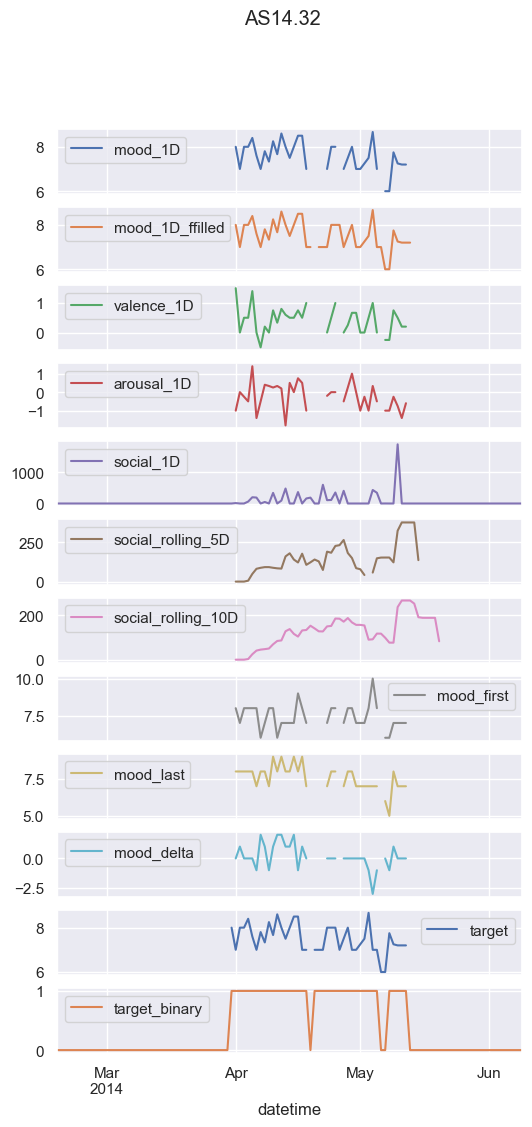

In [567]:
data.plot(subplots=True, figsize=(6, 12), title=id);

## Train and evaluate

In [569]:
def longest_continuous_stretch(x):
    # pad with np.nan
    x = np.append(np.nan, np.append(x, np.nan))
    # find where null
    w = np.where(np.isnan(x))[0]
    # diff to find length of stretch
    # argmax to find where largest stretch
    a = np.diff(w).argmax()
    # return original positions of boundary nulls
    return w[[a, a + 1]] + np.array([0, -2])

### Toy: decision trees for patient AS14.01

[0.66666667 0.77777778 0.77777778 0.88888889 0.66666667]
CV: 0.76 accuracy with a standard deviation of 0.08

accuracy train = [0.8611111111111112, 0.8611111111111112, 0.8611111111111112, 0.9166666666666666, 0.8611111111111112, 0.9166666666666666, 0.9166666666666666, 0.8611111111111112, 0.8888888888888888, 0.8611111111111112]
accuracy test  = [0.6666666666666666, 0.8888888888888888, 0.8888888888888888, 0.6666666666666666, 0.8888888888888888, 0.6666666666666666, 0.6666666666666666, 0.8888888888888888, 0.6666666666666666, 0.7777777777777778]

0.88 accuracy with a standard deviation of 0.03
0.77 accuracy with a standard deviation of 0.11


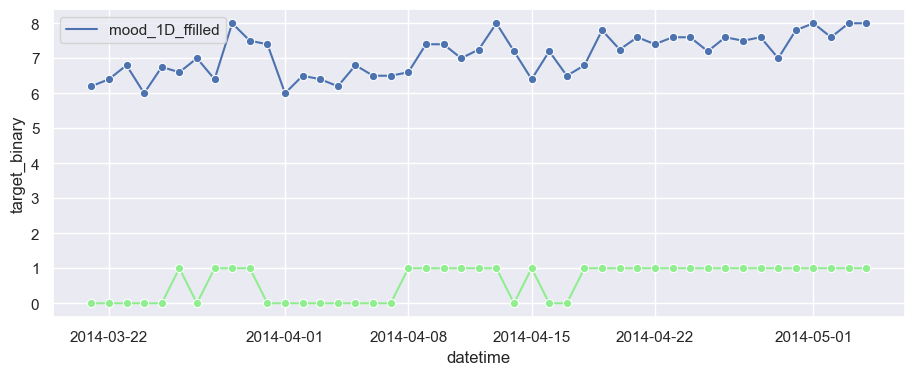

In [586]:
id = 'AS14.01'

[start, end] = longest_continuous_stretch(features[id]['mood_1D_ffilled']) 
x = features.iloc[start:end][id][['mood_1D_ffilled']]

# align y target to resulting x series
y = features[id]['target_binary']
# y = features[id]['target']
y = y.reindex_like(x)

sns.lineplot(x, marker='o')
sns.lineplot(y, marker='o', color='lightgreen')

# Preprocess labels
le = LabelEncoder()
le.fit(y)
y = le.transform(y)
 
# Decision tree
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, x, y, cv=5)
print(scores)
print(f"CV: {scores.mean():0.2f} accuracy with a standard deviation of {scores.std():0.2f}\n")

# Roll-your-own cross validation
accuracy = { 'train': [], 'test': [] }
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    clf.fit(x_train, y_train)

    y_train_predicted = clf.predict(x_train)
    accuracy['train'].append(accuracy_score(y_train, y_train_predicted))

    y_test_predicted = clf.predict(x_test)
    accuracy['test'].append(accuracy_score(y_test, y_test_predicted))


print(f"accuracy train = {accuracy['train']}")
print(f"accuracy test  = {accuracy['test']}\n")

print(f"{mean(accuracy['train']):0.2f} accuracy with a standard deviation of {stdev(accuracy['train']):0.2f}") 
print(f"{mean(accuracy['test']):0.2f} accuracy with a standard deviation of {stdev(accuracy['test']):0.2f}" )


## All ids: toy decision tree binary classifier


############################################################################################
id AS14.01:
	[0.66666667 0.77777778 0.77777778 0.88888889 0.66666667]
	CV: 0.76 accuracy with a standard deviation of 0.08

	accuracy train = [0.8611111111111112, 0.8888888888888888, 0.8611111111111112, 0.8888888888888888, 0.8888888888888888, 0.9444444444444444, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888]
	accuracy test  = [0.6666666666666666, 0.6666666666666666, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.4444444444444444, 0.7777777777777778, 0.6666666666666666, 0.7777777777777778, 0.6666666666666666]

	0.89 accuracy with a standard deviation of 0.02
	0.70 accuracy with a standard deviation of 0.11

############################################################################################
id AS14.02:
	[0.33333333 0.5        0.625      0.375      0.5       ]
	CV: 0.47 accuracy with a standard deviation of 0.10

	accuracy train = [0.90625,

/Users/adele/miniconda3/envs/torch/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/adele/miniconda3/envs/torch/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


	[0.3        0.44444444 0.44444444 0.33333333 0.55555556]
	CV: 0.42 accuracy with a standard deviation of 0.09

	accuracy train = [0.75, 0.75, 0.8055555555555556, 0.75, 0.7777777777777778, 0.75, 0.8055555555555556, 0.75, 0.7777777777777778, 0.7777777777777778]
	accuracy test  = [0.3, 0.5, 0.4, 0.5, 0.4, 0.5, 0.6, 0.4, 0.5, 0.4]

	0.77 accuracy with a standard deviation of 0.02
	0.45 accuracy with a standard deviation of 0.08

############################################################################################
id AS14.12:
	[1.    1.    0.75  0.875 0.875]
	CV: 0.90 accuracy with a standard deviation of 0.09

	accuracy train = [0.9375, 0.9375, 0.96875, 0.96875, 0.9375, 0.96875, 0.9375, 0.9375, 0.96875, 0.96875]
	accuracy test  = [1.0, 1.0, 0.875, 0.75, 1.0, 0.875, 1.0, 1.0, 0.875, 0.875]

	0.95 accuracy with a standard deviation of 0.02
	0.93 accuracy with a standard deviation of 0.09

############################################################################################
id 

/Users/adele/miniconda3/envs/torch/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


	[0.7        0.33333333 0.33333333 0.33333333 0.66666667]
	CV: 0.47 accuracy with a standard deviation of 0.17

	accuracy train = [0.6666666666666666, 0.7222222222222222, 0.7222222222222222, 0.6944444444444444, 0.7222222222222222, 0.6666666666666666, 0.75, 0.7222222222222222, 0.7222222222222222, 0.6666666666666666]
	accuracy test  = [0.5, 0.5, 0.3, 0.5, 0.2, 0.3, 0.4, 0.5, 0.3, 0.7]

	0.71 accuracy with a standard deviation of 0.03
	0.42 accuracy with a standard deviation of 0.15

############################################################################################
id AS14.20:
	[0.5        0.6        0.55555556 0.77777778 0.77777778]
	CV: 0.64 accuracy with a standard deviation of 0.12

	accuracy train = [0.7837837837837838, 0.7567567567567568, 0.7567567567567568, 0.7297297297297297, 0.7027027027027027, 0.7567567567567568, 0.7027027027027027, 0.7027027027027027, 0.7567567567567568, 0.7297297297297297]
	accuracy test  = [0.3, 0.5, 0.5, 0.5, 0.6, 0.3, 0.8, 0.6, 0.6, 0.5]

	0.74 ac

/Users/adele/miniconda3/envs/torch/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/adele/miniconda3/envs/torch/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


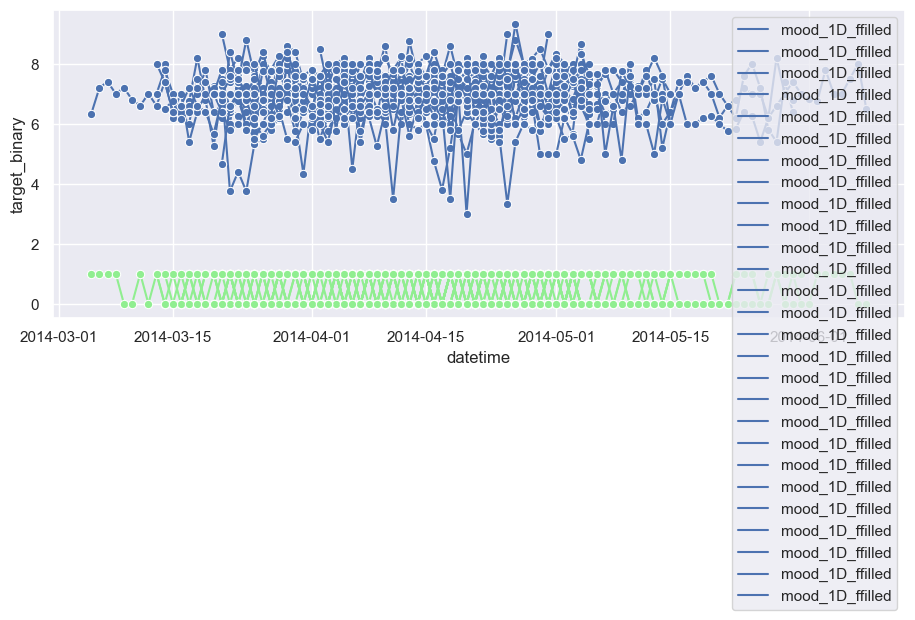

In [596]:
for id in ids:
    print(f"\n############################################################################################")
    print(f"id {id}:")
    
    [start, end] = longest_continuous_stretch(features[id]['mood_1D_ffilled']) 
    x = features.iloc[start:end][id][['mood_1D_ffilled']]

    # align y target to resulting x series
    y = features[id]['target_binary']
    # y = features[id]['target']
    y = y.reindex_like(x)

    sns.lineplot(x, marker='o')
    sns.lineplot(y, marker='o', color='lightgreen')

    # Preprocess labels
    le = LabelEncoder()
    le.fit(y)
    y = le.transform(y)

    # Decision tree
    clf = DecisionTreeClassifier()
    scores = cross_val_score(clf, x, y, cv=5)
    print(f"\t{scores}")
    print(f"\tCV: {scores.mean():0.2f} accuracy with a standard deviation of {scores.std():0.2f}\n")

    # Roll-your-own cross validation
    accuracy = { 'train': [], 'test': [] }
    for i in range(10):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

        clf.fit(x_train, y_train)

        y_train_predicted = clf.predict(x_train)
        accuracy['train'].append(accuracy_score(y_train, y_train_predicted))

        y_test_predicted = clf.predict(x_test)
        accuracy['test'].append(accuracy_score(y_test, y_test_predicted))


    print(f"\taccuracy train = {accuracy['train']}")
    print(f"\taccuracy test  = {accuracy['test']}\n")

    print(f"\t{mean(accuracy['train']):0.2f} accuracy with a standard deviation of {stdev(accuracy['train']):0.2f}") 
    print(f"\t{mean(accuracy['test']):0.2f} accuracy with a standard deviation of {stdev(accuracy['test']):0.2f}" )
